In [2]:
import random
import numpy as np 

def sample_line(n, p):
    
    dir_vec = np.random.randn(3) ;
    line_point = p ;
    parameter = np.transpose(np.random.randn(n)[np.newaxis]) ;
    line_points = line_point + parameter*dir_vec ;
      
    return line_points

In [3]:
import numpy as np

#Outputs n sample points from a random plane and m sample points from a line intersecting said random plane.
def plane_line(n, m) :
    sample_p = sample_plane(n)
    
    #Construct a random line through point sample_p[0]
    line_point = sample_p[0] 
    dir_vec = np.random.randn(3) 
    parameter = np.transpose(np.random.random(m)[np.newaxis])
    sample_l = line_point + parameter*dir_vec
    
    #The first element is an array of the n sample points from the plane.
    #The second element is an array of the m sample points from the line.
    return [sample_p, sample_l]

In [4]:
import numpy as np 

# Outputs n sample points from a random plane in R^3 as a matrix of the form nx3.
def sample_plane(n):
    
    normal_vec = 2*(np.random.random(3)-1/2)
    point_plane = 2*(np.random.random(3)-1/2) 
    plane_points = [] 
    
    #Points on the plane must satisfy the equation (n1,n2,n3).(x-p1, y-p2, z-p3) = 0, where . operation 
    #represents the dot product and (n1,n2,n3) is the normal vector and (p1,p2,p3) is a point on the plane.
    #We randomly sample for x and y and solve for z using the above equation. 
    for int in range(n) :
        sample_2coord = 2*(np.random.random(2)-1/2) 
        last_coord = sample_2coord - point_plane[0:2] 
        last_coord = -(np.dot(normal_vec[0:2], last_coord)-
                       normal_vec[2]*point_plane[2])/normal_vec[2] 
        sample_2coord = np.append(sample_2coord, last_coord) 
        plane_points = np.append(plane_points,sample_2coord)
   
    plane_points = np.reshape(plane_points, (n,3))    
         
    return plane_points

In [5]:
import numpy as np


def sample_sphere(n, c):
    """
    Outputs sample points from a random sphere in R^3 centered at c as a matrix 
    of the form nx3
    :param n: No. of points to be sampled
    :param c: Vector - Coordinates for center of sphere [x,y,z]
    :return: Coordinates of the n points on the sphere [x,y,z]
    Note: We use the last construction found in http://mathworld.wolfram.com/SpherePointPicking.html
    """
    vec = 2*(np.random.random((3, n))-1/2)
    vec /= np.linalg.norm(vec, axis=0)
    recenter = np.repeat(c, n)
    recenter = np.reshape(recenter, (3, n))
    vec = vec + recenter
    
    return np.transpose(vec)


In [6]:
import numpy as np
from numpy import linalg as LA
#import sample_sphere as ss
#from sample_sphere import *

def plane_sphere(n, c, m) :
    """
    Constructs n sample points from a unit sphere centered at c and
    m sample points from a plane which intersects the unit sphere.
    If there are any k points from the m sample points that is contained
    in the unit sphere, we remove them and outputs only the m-k sample points.
    i.e. we do not produce any sample points inside the unit sphere. 
    """
    sphere = sample_sphere(n, c) 
    
    #We construct the plane containing the first 3 sample points 
    #sample_s[0:3] on the sphere. 
    plane_points = sphere[0:3]
    #Finding the normal vector
    vec1 = plane_points[1]-plane_points[0] 
    vec2 = plane_points[2]-plane_points[0] 
    #Normal vector 
    normal_vec = np.cross(vec1, vec2) 
    
    #Points on the plane must satisfy the equation 
    #(n1,n2,n3).(x-p1, y-p2, z-p3) = 0, where . operation 
    #represents the dot product and (n1,n2,n3) is the normal vector and 
    #(p1,p2,p3) is a point on the plane (we call it p0 in the code below).
    #We randomly sample for x and y and solve for z using the above equation. 
    p0=plane_points[0]
    for int in range(m) :
        sample_coord = 2*(np.random.random(2)-1/2) 
        first_coords = sample_coord - p0[0:2]
        last_coord = -(np.dot(normal_vec[0:2], first_coords)-
                       normal_vec[2]*p0[2])/normal_vec[2] 
        sample_coord = np.append(sample_coord, last_coord) 
        plane_points = np.append(plane_points,sample_coord)
    
    plane_points = np.reshape(plane_points, (m+3,3))
    
    #We remove any points on the plane that is inside the unit sphere.
    relevant_points = []
    for i in range(m+3) :
        if LA.norm(plane_points[i]-c)>=1 :
            relevant_points = np.append(relevant_points, plane_points[i])
        
    relevant_points =np.reshape(relevant_points, (-1,3))
    
    return [sphere, relevant_points]

In [7]:
import numpy as np
from numpy import linalg as LA
def line_plane_sphere(k, n, c, m) :
    
    ps = plane_sphere(n, c, m) 
    plane = ps[0] 
    sphere = ps[1] 
    #combin_ps = np.reshape(np.append(sphere, plane), (-1,3)) 
    plane_tup = list(tuple(row) for row in plane)
    sphere_tup = list(tuple(row) for row in sphere)
    intersection = np.array([list(item) for item in 
                    set(plane_tup).intersection(sphere_tup)]) 
    if len(intersection) == 0 :
        return ["intersection empty", intersection]
    line = sample_line(k, intersection[0])
    
    #We remove any points on the plane that is inside the unit sphere.
    rel_line_pts = []
    for i in range(k) :
        if LA.norm(line[i]-c)>=1 :
            rel_line_pts = np.append(rel_line_pts, line[i])
        
    rel_line_pts =np.reshape(rel_line_pts, (-1,3))
    
    return [rel_line_pts, plane, sphere]

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#%matplotlib inline

def plot_objects(X) :
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection='3d')
    if len(X)==2 :
        A = X[0]
        B = X[1]
        ax.scatter(A[:,0],A[:,1], A[:,2]) 
        ax.scatter(B[:,0],B[:,1], B[:,2], color = 'c')
        plt.show()
    else:
        if len(X)==3 :
            A = X[0]
            B = X[1]
            C = X[2]
            ax.scatter(A[:,0],A[:,1], A[:,2]) 
            ax.scatter(B[:,0],B[:,1], B[:,2], color = 'c')
            ax.scatter(C[:,0],C[:,1], C[:,2], color = 'r')
            plt.show()
        else:
            ax.scatter(X[:,0],X[:,1], X[:,2])
            plt.show()

In [9]:
import numpy as np
import scipy.spatial as spatial

def neighborhood(data, point, rad) :
    coord_set = list(tuple(row) for row in data)
    tree = spatial.cKDTree(coord_set)
    
    return tree.data[tree.query_ball_point(point, rad)]

In [38]:
import pycuda.driver as cuda
import numpy as np
import pycuda.autoinit
from pycuda.compiler import SourceModule
import pycuda.gpuarray as gpuarray
import numpy as np
import skcuda
import skcuda.linalg as linalg
linalg.init()
from . import cuda


def svd(data) :
    
    #dat = data - np.mean(data, axis = 0)
    import numpy as np
    import pycuda.autoinit
    import pycuda.gpuarray as gpuarray
    import numpy as np
    import skcuda.linalg as linalg
    data_torch=torch.from_numpy(data)
#     linalg.init()
#     a = np.asarray(data)
#     a=np.transpose(a)
#     a_gpu = gpuarray.to_gpu(a)
#     u_gpu, s_gpu, vh_gpu = skcuda.linalg.svd(a_gpu, jobu='A', jobvt='A',lib='cusolver')
#     s_gpu = np.asarray(s_gpu)
    u,s,v=torch.svd(data_torch)
    return s

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#%matplotlib inline

def plot_objects(X) :
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection='3d')
    if len(X)==2 :
        A = X[0]
        B = X[1]
        ax.scatter(A[:,0],A[:,1], A[:,2]) 
        ax.scatter(B[:,0],B[:,1], B[:,2], color = 'c')
        plt.show()
    else:
        if len(X)==3 :
            A = X[0]
            B = X[1]
            C = X[2]
            ax.scatter(A[:,0],A[:,1], A[:,2]) 
            ax.scatter(B[:,0],B[:,1], B[:,2], color = 'c')
            ax.scatter(C[:,0],C[:,1], C[:,2], color = 'r')
            plt.show()
        else:
            ax.scatter(X[:,0],X[:,1], X[:,2])
            plt.show()

In [93]:
import numpy as np
import math
#Input a matrix data, a threshold K to determine the min number  
#of points in each neighborhood, a threshold thres for percentage of variance 
#to exhibit and num, the number of radii
def intrinsic_dim1(data, K, thres, num) :
    #Construct radius vector
    rads = [(1/2.)**(i) for i in range(num)] 
    dims = np.zeros((len(data), num))
    int_dim = np.zeros(len(data))
    elem_ind = -1 
#     print("Our radius vector is:")
#     print(rads)
#     print("")
    count=0
    for elem in data :
        count=count+1
        print(count)
        density = []
        elem_ind += 1
        rad_ind = -1
        for radius in rads :
            D_n = neighborhood(data, elem, radius)
            #print(D_n)
            rad_ind += 1
#             print("The neighborhood around of", elem, "with radius", radius )
#             print(D_n)
#             print("")
            if len(D_n) < math.log(K*math.log(K)):
#                 print("The neighborhood does not have enough points.")
                density.append(0)
                dims[elem_ind, rad_ind] = -1
            else:
                density.append(1)
                D_n0 = D_n - np.mean(D_n, axis = 0)
#                 print("Size of the neighborhood is ")
#                 print(len(D_n0))
                D_n0 = (1/(len(D_n0)-1)**(1/2.))*D_n0
                S = svd(D_n0)
               # print(S)
                S_2 = np.multiply(S,S)
               # print(S_2[1])
                TV = sum(S_2)
#                 print("The total variance is")
#                 print(TV)
#                 print("")
#                 print("The variance is")
#                 print(S_2)
               # print("")
                #CRV =np.asarray([(1/TV)*sum(S_2[0:i]) for i in range(len(S_2)+1)][1:])
                CRV=[]
                temp=[]
                for i in range(len(S_2)):
                    var=0
                    for j in range(i):
                        var=var+S_2[j]
                    rel=var/TV
                    CRV.append(rel)
                        
                    
                    
                CRV=np.asarray(CRV)    
#                 print("The cumulative relative variance is")
#                 print(CRV)
#                 print("")
                CRV_bool = CRV > thres
#                 print("Finding the index when CRV surpasses the threshold")
#                 print(CRV_bool)
#                 print("")
                ind = [i for i,x in enumerate(CRV_bool) if x]
#                 print(ind)
    
                if len(ind)==0:
                    dims[elem_ind, rad_ind] = 0
#                     print("The dimension of ", elem, "with radius", radius)
#                     print(dims[elem_ind, rad_ind])
#                     print("")
            
                else:
                    dims[elem_ind, rad_ind] = ind[0]+1 
#                     print("The dimension of ", elem, "with radius", radius)
#                     print(dims[elem_ind, rad_ind])
#                     print("")
                
#         if len(i for i in dims[elem_ind, :] if i>-1 )>0:
#             int_dim[elem_ind] = min(i for i in dims[elem_ind, :] if i>-1)
#         else:
#             int_dim[elem_ind] = 0
            
            
        min_list=[]
        for i in [elem_ind,]:
            if i>-1:
                min_list.append(i)
        if len(min_list)>0:
            int_dim[elem_ind] = min(min_list)
        else:
            int_dim[elem_ind] = 0
                    
            

            
#         print("The intrinsic dim of ", elem)
#         print(int_dim[elem_ind])
#         print("")
    return [int_dim, dims, density]

In [35]:
t1 = line_plane_sphere()

In [36]:
t2 = t1[0]
t3 = t1[1]
t4 = t1[2]

In [37]:
t5 = np.append(t2,t3)

In [38]:
t5 = np.append(t5,t4)

In [40]:
t = np.reshape(t5, (-1,3))

In [41]:
I = intrinsic_dim1(t, 3, .95, 5)

C:\Users\Kafung\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Kafung\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Kafung\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in greater


IndexError: list index out of range

In [285]:
I[0]

array([ 1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  1.,  2.,
        1.,  2.,  1.,  1.,  2.,  2.,  1.,  2.,  1.,  2.,  3.,  1.,  1.,
        2.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,  2.,  2.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [ ]:
t9 = line_plane_sphere(50, 500, [0,0,0], 500)

In [ ]:
plot_objects(test)

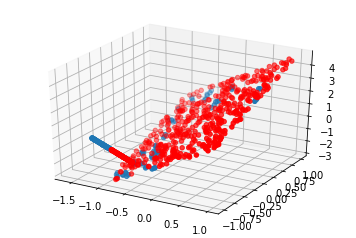

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import cm

%matplotlib inline
int_dims = I[0]
dims = I[1]
stack = t
sample_set = t
#ind_rem_ss = []
j = 0
#size = len(t)
#color=iter(cm.rainbow(np.linspace(0,1,size)))
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
dim_1 = []
dim_2 = []
dim_3 = []
while len(stack)!=0 :
    j += 1
    #Use the first guy in stack as the element to look at
    element = stack[0] 
    #print("We're looking at the point:")
    #print(element)
    #print("")
    #Finds the index in sample_set where element lies
    ind = np.where(sample_set == element)[0][0]
    #print("The index of element in sample_set is")
    #print(ind)
    #print("")
    #Finds the intrinsic dimesion of element
    dim_el = int_dims[ind]
    #print("The intrinsic dimension of this element is")
    #print(dim_el)
    #print("")
    #Finds the first occurence of this dimension in dims
    rad_exp = np.where(dims[ind]==dim_el)[0][0]
    #print("The exponent of 1/2 that we need to create the radius to find the neighborhood is")
    #print(rad_exp)
    #print("")
    neighbors =  neighborhood(stack, element, (1/2)**(rad_exp))
    #print("The size of this neighborhood is")
    #print(len(neighbors))
    #print("")
    #Find the indices of neighbors in stack
    remove_ind = [i for i, e in enumerate(stack) if e in neighbors]
    #print("The indices of all the elements from neighbors in stack is")
    #print(remove_ind)
    #print("")
    stack = np.delete(stack, remove_ind, axis =0)
    #print("The new stack size is")
    #print(len(stack))
    #print("")
    #np.append(neigh_sets, neighbors)
    #c=next(color)
    #plt.figure()
    if dim_el == 1.0:
        dim_1 = np.append(dim_1, neighbors)
        #print("It's in dim 1")
        #ax.scatter(neighbors[:,0],neighbors[:,1], neighbors[:,2], c='r')
        #plt.show()
    else:
        if dim_el == 2.0:
            dim_2 = np.append(dim_2, neighbors)
            #ax.scatter(neighbors[:,0],neighbors[:,1], neighbors[:,2], c='g')
            #plt.show()
            #print("It's in dim 2")
        else:
            dim_3 = np.append(dim_3, neighbors)
            #ax.scatter(neighbors[:,0],neighbors[:,1], neighbors[:,2])
            #plt.show()
    #print("")        
dim_1 = np.reshape(dim_1, (-1, 3))
dim_2 = np.reshape(dim_2, (-1, 3))
dim_3 = np.reshape(dim_3, (-1, 3))
ax.scatter(dim_1[:,0], dim_1[:,1], dim_1[:,2])
ax.scatter(dim_2[:,0], dim_2[:,1], dim_2[:,2], c = 'r')
ax.scatter(dim_3[:,0], dim_3[:,1], dim_3[:,2], c = 'g')
plt.show()

In [335]:
j

10

In [332]:
len(dim_1)

190

In [333]:
len(dim_2)

660

In [334]:
len(dim_3)

0

In [ ]:
plot_objects(t1)

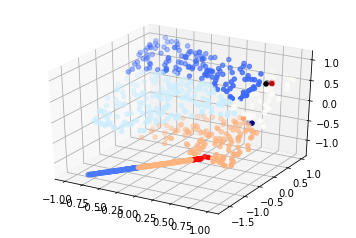

In [329]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import cm

%matplotlib inline
int_dims = I[0]
dims = I[1]
stack = t
sample_set = t
#size = len(t)
color=iter(cm.flag(np.linspace(0,1,size)))
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
i = 0

while len(stack)!=0 :
    i += 1
    #Use the first guy in stack as the element to look at
    element = stack[0] 
#     print("We're looking at the point:")
#     print(element)
#     print("")
    #Finds the index in sample_set where element lies
    ind = np.where(sample_set == element)[0][0]
    #print("The index of element in sample_set is")
    #print(ind)
    #print("")
    #Finds the intrinsic dimesion of element
    dim_el = int_dims[ind]
    #print("The intrinsic dimension of this element is")
    #print(dim_el)
    #print("")
    #Finds the first occurence of this dimension in dims
    rad_exp = np.where(dims[ind]==dim_el)[0][0]
    #print("The exponent of 1/2 that we need to create the radius to find the neighborhood is")
    #print(rad_exp)
    #print("")
    neighbors =  neighborhood(stack, element, (1/2)**(rad_exp))
    #print("The size of this neighborhood is")
    #print(len(neighbors))
    #print("")
    #Find the indices of neighbors in stack
    remove_ind = [i for i, e in enumerate(stack) if e in neighbors]
    #print("The indices of all the elements from neighbors in stack is")
    #print(remove_ind)
    #print("")
    stack = np.delete(stack, remove_ind, axis =0)
    #print("The new stack size is")
    #print(len(stack))
    #print("")
    #np.append(neigh_sets, neighbors)
    #c=next(color)
    #plt.figure()
    c=next(color)
    #plt.figure()
    ax.scatter(neighbors[:,0],neighbors[:,1], neighbors[:,2], c=c)
plt.show()

In [330]:
i

10

In [13]:
### Read thread_x file and convert to a PANDAS dataframe (and one CSV)
### Column Names for our dataframe
import pandas as pd

col_names = ['id', 'time', 'position.x','position.y', 'velocity.x','velocity.y', 'curentGoal.x', 'currentGoal.y', 'radius', 'acceleration', 'personal_space_threshold','agent_repulsion_importance', 'query_radius', 'body_force', 'agent_body_force', 'sliding_friction_force', 'agent_b', 'agent_a', 'wall_b', 'wall_a', 'max_speed', 'target.x', 'target.y']

# Convert the file into a Pandas DF. Ignore first line (header=0) and use col_names as headers instead.
# Play around with this df and generalize the outcomes for the other 7 files

df = pd.read_csv('scenario-2_run0.txt', header=0, names=col_names)
df.head(10)

,id,time,position.x,position.y,velocity.x,velocity.y,curentGoal.x,currentGoal.y,radius,acceleration,...,body_force,agent_body_force,sliding_friction_force,agent_b,agent_a,wall_b,wall_a,max_speed,target.x,target.y
0,0,0.050000,30.559385,11.506657,0.130592,0.107181,46.5,25.5,0.818415,0.39362,...,2241.714111,1678.922363,2000.167847,0.098307,25.461973,0.116296,13.497192,3.101996,47.0,25.0
1,0,0.100000,30.571615,11.516694,0.244596,0.200748,46.5,25.5,0.818415,0.39362,...,2241.714111,1678.922363,2000.167847,0.098307,25.461973,0.116296,13.497192,3.101996,47.0,25.0
2,0,0.150000,30.588821,11.530815,0.344118,0.282429,46.5,25.5,0.818415,0.39362,...,2241.714111,1678.922363,2000.167847,0.098307,25.461973,0.116296,13.497192,3.101996,47.0,25.0
3,0,0.199999,30.610371,11.548502,0.430998,0.353734,46.5,25.5,0.818415,0.39362,...,2241.714111,1678.922363,2000.167847,0.098307,25.461973,0.116296,13.497192,3.101996,47.0,25.0
4,0,0.249999,30.635714,11.569301,0.506843,0.415982,46.5,25.5,0.818415,0.39362,...,2241.714111,1678.922363,2000.167847,0.098307,25.461973,0.116296,13.497192,3.101996,47.0,25.0
5,0,0.299999,30.664366,11.592816,0.573053,0.470323,46.5,25.5,0.818415,0.39362,...,2241.714111,1678.922363,2000.167847,0.098307,25.461973,0.116296,13.497192,3.101996,47.0,25.0
6,0,0.349999,30.695908,11.618705,0.630853,0.517761,46.5,25.5,0.818415,0.39362,...,2241.714111,1678.922363,2000.167847,0.098307,25.461973,0.116296,13.497192,3.101996,47.0,25.0
7,0,0.399999,30.729973,11.646664,0.681310,0.559173,46.5,25.5,0.818415,0.39362,...,2241.714111,1678.922363,2000.167847,0.098307,25.461973,0.116296,13.497192,3.101996,47.0,25.0
8,0,0.449999,30.766241,11.676430,0.725359,0.595325,46.5,25.5,0.818415,0.39362,...,2241.714111,1678.922363,2000.167847,0.098307,25.461973,0.116296,13.497192,3.101996,47.0,25.0
9,0,0.499999,30.804432,11.707774,0.763812,0.626885,46.5,25.5,0.818415,0.39362,...,2241.714111,1678.922363,2000.167847,0.098307,25.461973,0.116296,13.497192,3.101996,47.0,25.0


In [48]:
import pandas as pd

col_names=['X','Y','Z']
# Convert the file into a Pandas DF. Ignore first line (header=0) and use col_names as headers instead.
# Play around with this df and generalize the outcomes for the other 7 files

df = pd.read_csv('Bridge_87K.csv', names=col_names)
df.head(10)

,X,Y,Z
0,545899.787,4186145.146,1.026
1,545899.194,4186144.697,1.076
2,545898.574,4186144.223,0.930
3,545897.800,4186144.092,1.003
4,545898.349,4186146.169,1.058
5,545897.751,4186145.716,1.028
6,545898.263,4186146.692,0.926
7,545899.488,4186147.628,1.057
8,545899.045,4186148.848,1.022
9,545896.366,4186149.063,1.172


In [51]:

df_XYZ=pd.concat([df['X'], df['Y'], df['Z']], axis=1)
print(df_XYZ)

                X            Y       Z
0      545899.787  4186145.146   1.026
1      545899.194  4186144.697   1.076
2      545898.574  4186144.223   0.930
3      545897.800  4186144.092   1.003
4      545898.349  4186146.169   1.058
5      545897.751  4186145.716   1.028
6      545898.263  4186146.692   0.926
7      545899.488  4186147.628   1.057
8      545899.045  4186148.848   1.022
9      545896.366  4186149.063   1.172
10     545887.983  4186144.055  98.905
11     545888.312  4186144.151  80.857
12     545888.861  4186144.569  80.865
13     545890.766  4186146.925   0.854
14     545886.812  4186144.549  72.722
15     545888.719  4186146.765  98.867
16     545886.439  4186144.882  81.701
17     545890.826  4186147.549   1.008
18     545894.043  4186151.566   1.242
19     545892.219  4186150.177   0.943
20     545883.364  4186144.009   0.991
21     545884.535  4186144.901   1.004
22     545896.449  4186155.651   1.015
23     545895.837  4186155.185   0.999
24     545888.030  418614

In [52]:
test=np.asarray(df_XYZ)

In [53]:
len(test)

87774

In [94]:
int_test = intrinsic_dim1(test, 3, .95, 3)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140


KeyboardInterrupt: 

In [17]:
print(D_n0)

[]


In [34]:
from __future__ import print_function
import torch
import torch.cuda